In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

import seaborn as sb

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [98]:
# https://data.nasdaq.com/tables/RTAT/NDAQ-RTAT10
df = pd.read_csv('NDAQ-RTAT10.csv')

In [99]:
df

,date,ticker,activity,sentiment
0,2022-08-26,TSLA,0.0450,5
1,2022-08-26,TQQQ,0.0284,-1
2,2022-08-26,SQQQ,0.0312,7
3,2022-08-26,SPY,0.0416,4
4,2022-08-26,QQQ,0.0321,5
...,...,...,...,...
9995,2018-09-07,FB,0.0229,0
9996,2018-09-07,BABA,0.0152,3
9997,2018-09-07,AMZN,0.0335,3
9998,2018-09-07,AMD,0.0437,5


In [100]:
tickers = list(df.ticker.unique())

ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  314 of 314 completed

21 Failed downloads:
- OBLN: No data found, symbol may be delisted
- WORK: No data found, symbol may be delisted
- DISCA: No data found, symbol may be delisted
- WLL: No data found, symbol may be delisted
- ACY: No data found, symbol may be delisted
- FB: No data found, symbol may be delisted
- CTRP: No data found, symbol may be delisted
- CELG: No data found, symbol may be delisted
- MYL: No data found, symbol may be delisted
- CCIV: No data found, symbol may be delisted
- LK: No data found, symbol may be delisted
- TRCH: No data found, symbol may be delisted
- APHA: No data found, symbol may be delisted
- SGLB: No data found, symbol may be delisted
- ORPH: No data found, symbol may be delisted
- XLNX: No data found, symbol may be delisted
- SGOC: No data found, symbol may be delisted
- PYX: No data found, symbol may be delisted
- VIAC: No data found, symbol may be delisted
- SPRT: No data found, symbol may be d

,AACG,AAL,AAPL,ABBV,ABNB,ABT,ACAD,ACB,ACY,ADBE,...,XELA,XL,XLNX,XPEV,XPO,Z,ZEV,ZM,ZS,ZY
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-29 00:00:00,2.45,13.51,161.380005,135.710007,113.540001,101.839996,16.469999,1.62,NaN,375.260010,...,1.000,1.17,NaN,18.51,53.369999,33.419998,2.50,81.000000,158.529999,2.34
2022-08-30 00:00:00,2.54,13.33,158.910004,135.550003,112.559998,102.199997,16.120001,1.52,NaN,375.070007,...,0.948,1.15,NaN,18.26,53.200001,33.680000,2.48,81.419998,160.880005,2.28
2022-08-31 00:00:00,2.50,12.99,157.220001,134.460007,113.120003,102.650002,16.430000,1.60,NaN,373.440002,...,0.942,1.12,NaN,18.52,52.419998,33.459999,2.84,80.400002,159.240005,2.37
2022-09-01 00:00:00,2.46,12.93,157.960007,138.449997,113.400002,104.839996,16.870001,1.50,NaN,370.529999,...,0.888,1.09,NaN,17.33,52.930000,34.369999,2.52,81.139999,145.570007,2.39
2022-09-02 00:00:00,2.19,12.99,155.809998,136.279999,113.639999,102.500000,16.730000,1.51,NaN,368.140015,...,0.868,1.12,NaN,16.74,52.500000,34.049999,2.50,80.790001,145.119995,2.20


In [143]:
 df3['activity'].rolling(5).sum()

14270       NaN
14271       NaN
14272       NaN
14273       NaN
14274    0.1222
          ...  
15270    0.2445
15271    0.2411
15272    0.2326
15273    0.2250
15274    0.2250
Name: activity, Length: 1005, dtype: float64

In [142]:
 df3['activity'].rolling(5).sum().shift(1)

14270       NaN
14271       NaN
14272       NaN
14273       NaN
14274       NaN
          ...  
15270    0.2393
15271    0.2445
15272    0.2411
15273    0.2326
15274    0.2250
Name: activity, Length: 1005, dtype: float64

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


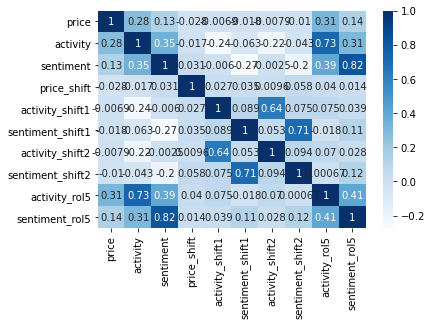

reg.score 0.005684165532400143
reg.coef_ [[ 5.49225495e+00 -1.64702140e-02 -4.26460415e+00  1.35282022e-01
   1.38849325e+00 -2.08691373e-03]]
reg.intercept_ [-0.35619387]
r^2 0.005684165532400143
AAPL (15275, 2) (999, 4) (1000, 12)
             price     activity    sentiment  price_shift  activity_shift1  \
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.000000   
mean    102.321800     0.036832    -0.012000    -0.101278         0.000037   
std      45.111934     0.016020     2.574584     2.233276         0.013574   
min      34.366493     0.011300    -8.000000   -11.064240        -0.122900   
25%      54.018495     0.026475    -2.000000    -1.115266        -0.004800   
50%     112.984859     0.034450     0.000000    -0.093737         0.000400   
75%     143.557137     0.042500     2.000000     0.824642         0.005800   
max     181.259918     0.172000     9.000000    10.394516         0.100800   

       sentiment_shift1  activity_shift2  sentiment_shift2  acti

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


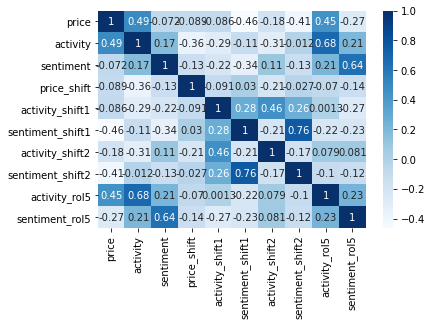

reg.score 0.06641473552248578
reg.coef_ [[-1.81282625e+00  6.66604392e-02 -3.43371927e+01 -2.65234079e-01
  -6.71087090e-01 -3.05481092e-02]]
reg.intercept_ [0.47965327]
r^2 0.06641473552248578
AMC (15275, 2) (128, 4) (400, 12)
            price    activity   sentiment  price_shift  activity_shift1  \
count  400.000000  400.000000  400.000000   400.000000       400.000000   
mean    24.080675    0.022320    0.047500    -0.002650         0.007151   
std     14.081780    0.024905    2.033613     2.540987         0.017777   
min      5.500000    0.009300   -3.000000   -30.509998        -0.116700   
25%     12.730000    0.012600   -1.000000    -0.610001         0.003350   
50%     18.290000    0.016900    0.000000     0.095000         0.006100   
75%     36.789999    0.020325    1.000000     0.885000         0.016300   
max     62.549999    0.261500   14.000000    11.209999         0.144000   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count        400.00

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


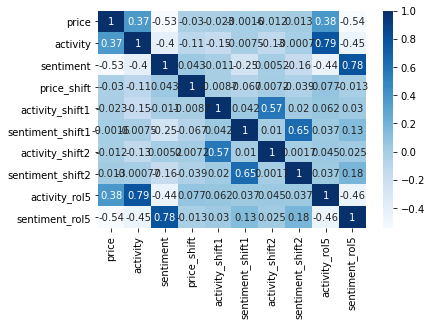

reg.score 0.012501889702794866
reg.coef_ [[-5.56364911e+00 -1.15283428e-01  4.55046108e+00 -3.16122333e-03
   3.87303636e+00  8.01966468e-03]]
reg.intercept_ [-0.67604639]
r^2 0.012501889702794866
AMD (15275, 2) (914, 4) (1000, 12)
             price     activity    sentiment  price_shift  activity_shift1  \
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.000000   
mean     68.591580     0.026495     2.595000    -0.049760         0.000473   
std      35.428098     0.014755     2.903688     2.604955         0.010104   
min      16.650000     0.009700    -8.000000   -13.820007        -0.053700   
25%      32.092501     0.015675     1.000000    -1.152500        -0.003225   
50%      77.044998     0.021350     3.000000    -0.010002         0.000750   
75%      92.660004     0.033225     4.000000     0.932500         0.004800   
max     161.910004     0.093700    10.000000    12.589996         0.049600   

       sentiment_shift1  activity_shift2  sentiment_shift2  activ

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


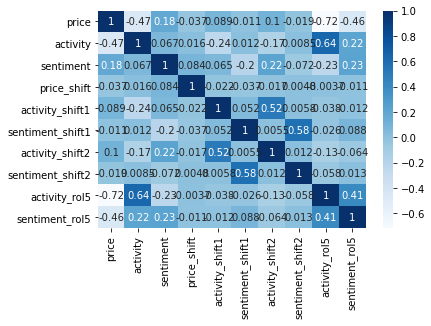

reg.score 0.0028316160036029325
reg.coef_ [[-4.87262993e+00 -2.00250788e-01 -3.85046752e+00  1.52440549e-01
  -1.41718153e-01 -3.69849652e-03]]
reg.intercept_ [0.00380916]
r^2 0.0028316160036029325
AMZN (15275, 2) (584, 4) (1000, 12)
             price     activity    sentiment  price_shift  activity_shift1  \
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.000000   
mean    127.997541     0.022123     0.764000    -0.028017         0.001379   
std      34.661383     0.010704     1.315308     2.880384         0.008015   
min      67.197998     0.009300    -5.000000   -18.793991        -0.058400   
25%      92.361000     0.015575     0.000000    -1.386127        -0.000500   
50%     127.665001     0.018550     1.000000    -0.090500         0.002200   
75%     161.200123     0.027200     2.000000     1.356001         0.003325   
max     186.570496     0.081300     4.000000    20.314995         0.056700   

       sentiment_shift1  activity_shift2  sentiment_shift2  act

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


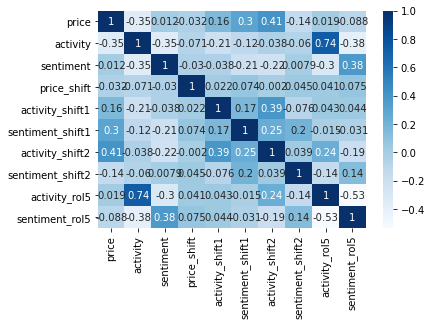

reg.score 0.022491214871559695
reg.coef_ [[ 13.78624067   0.5909098  -27.70104089   0.30170285  16.50279243
    0.15963479]]
reg.intercept_ [-1.95755049]
r^2 0.022491214871559695
BA (15275, 2) (281, 4) (875, 12)
            price    activity   sentiment  price_shift  activity_shift1  \
count  875.000000  875.000000  875.000000   875.000000       875.000000   
mean   235.716671    0.018396    1.238857     0.249478         0.002767   
std     77.565802    0.011598    3.529393     6.811142         0.006326   
min     95.010002    0.007000   -7.000000   -31.049995        -0.039300   
25%    174.349998    0.011800   -1.000000    -3.114998         0.002400   
50%    216.669998    0.014100    1.000000     0.400009         0.002400   
75%    325.065948    0.024000    3.000000     3.718941         0.005700   
max    386.588318    0.090200   10.000000    41.929993         0.037200   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count        875.000000       875.0

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


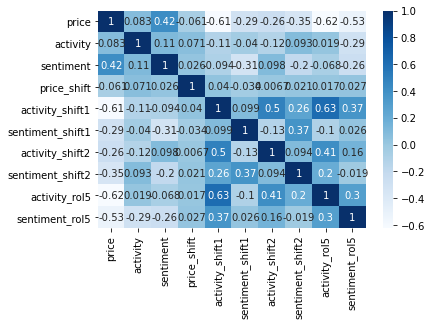

reg.score 0.00496401433999627
reg.coef_ [[ 3.77568330e+01 -2.15814462e-01 -1.75477158e+01  2.33024866e-01
  -6.61534876e+00  1.11104366e-02]]
reg.intercept_ [0.69846721]
r^2 0.00496401433999627
BABA (15275, 2) (185, 4) (1000, 12)
             price     activity    sentiment  price_shift  activity_shift1  \
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.000000   
mean    183.585340     0.017298     0.654000     0.073730         0.002069   
std      53.629570     0.007346     2.572334     4.936535         0.007811   
min      76.760002     0.008500   -10.000000   -28.220001        -0.029800   
25%     149.582504     0.013000    -1.000000    -2.695000        -0.003000   
50%     178.755005     0.015800     0.000000     0.204994         0.001400   
75%     219.560001     0.020000     3.000000     2.602493         0.007700   
max     317.140015     0.132100     6.000000    34.179993         0.079800   

       sentiment_shift1  activity_shift2  sentiment_shift2  activit

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


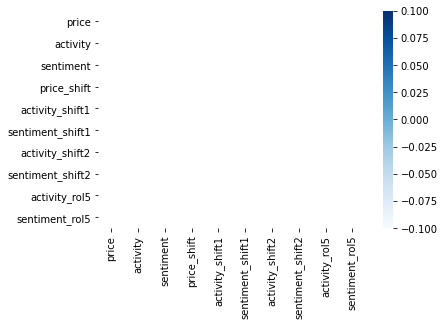

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


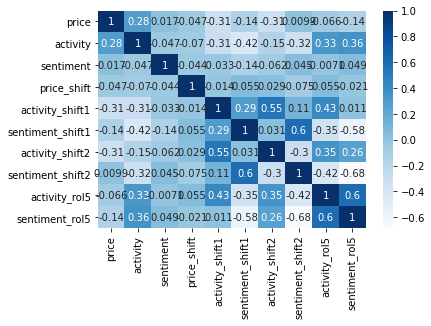

reg.score 0.04117789929964644
reg.coef_ [[-125.18131194    1.16954084   12.52100185   -1.36123082   50.19982193
    -0.18731471]]
reg.intercept_ [-5.73585928]
r^2 0.04117789929964644
MRNA (15275, 2) (118, 4) (575, 12)
            price    activity   sentiment  price_shift  activity_shift1  \
count  575.000000  575.000000  575.000000   575.000000       575.000000   
mean   176.508522    0.017002   -0.500870    -0.120991         0.007821   
std     97.253013    0.009276    1.962963    10.843443         0.011201   
min     52.180000    0.010300   -9.000000   -70.750000        -0.046500   
25%    122.474998    0.011900   -1.000000    -5.129997        -0.000100   
50%    155.050003    0.013800    0.000000     0.110001         0.015700   
75%    215.644997    0.019500    0.000000     3.899994         0.016100   
max    484.470001    0.096900    4.000000    71.430023         0.071800   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count        575.000000      

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


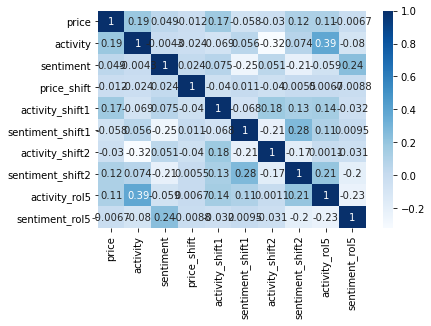

reg.score 0.002868598376590148
reg.coef_ [[-2.62843510e+01  5.31750821e-04 -2.55522099e+01  1.51300694e-03
   2.09120992e+00 -2.60918212e-03]]
reg.intercept_ [-0.29157315]
r^2 0.002868598376590148
MSFT (15275, 2) (422, 4) (948, 12)
            price    activity   sentiment  price_shift  activity_shift1  \
count  948.000000  948.000000  948.000000   948.000000       948.000000   
mean   209.158981    0.015046    1.612869    -0.161528         0.000043   
std     69.673501    0.005582    2.674713     4.048857         0.005454   
min     90.432289    0.007500   -7.000000   -19.326859        -0.025800   
25%    139.608299    0.011300    0.000000    -2.109497        -0.003100   
50%    210.106995    0.013550    1.000000    -0.220741        -0.001100   
75%    271.862946    0.016900    3.000000     1.563320         0.002600   
max    340.882782    0.047000   11.000000    22.885254         0.030700   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count        94

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


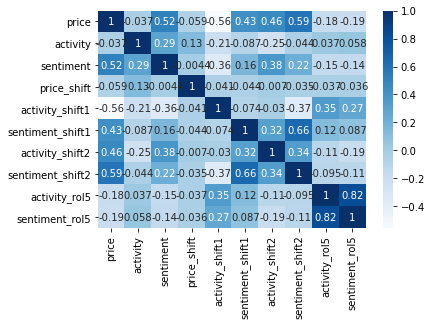

reg.score 0.005505948947448491
reg.coef_ [[-60.41732375  -0.16953742   8.85063383  -0.73353784  -0.48163027
   -0.06160084]]
reg.intercept_ [0.43146557]
r^2 0.005505948947448491
NFLX (15275, 2) (242, 4) (1000, 12)
             price     activity    sentiment  price_shift  activity_shift1  \
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.000000   
mean    408.850149     0.016791     0.273000     0.142040         0.003318   
std     122.771081     0.007209     1.722625    11.712084         0.010488   
min     166.369995     0.007900    -4.000000   -84.570038        -0.064400   
25%     320.192490     0.011500    -1.000000    -5.422508        -0.003500   
50%     378.934998     0.015500     0.000000    -0.044998        -0.000100   
75%     509.805008     0.019100     2.000000     5.552528         0.006500   
max     691.690002     0.095400     3.000000   122.419983         0.070200   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count 

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


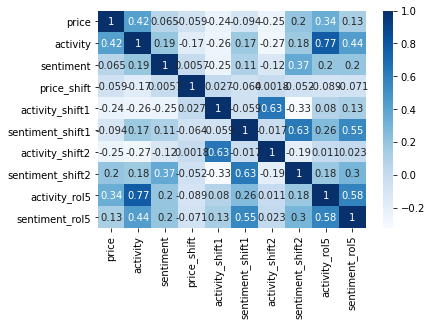

reg.score 0.011336727767897514
reg.coef_ [[ 7.23224778e+00 -4.45645090e-02 -6.21062780e+00 -4.80383938e-03
  -1.86095858e+00 -1.89283447e-03]]
reg.intercept_ [0.18500923]
r^2 0.011336727767897514
NIO (15275, 2) (221, 4) (542, 12)
            price    activity   sentiment  price_shift  activity_shift1  \
count  542.000000  542.000000  542.000000   542.000000       542.000000   
mean    32.281956    0.020336    1.389299    -0.005074         0.002741   
std     12.910602    0.014831    1.992990     1.612850         0.011366   
min     11.090000    0.009400   -5.000000    -6.139999        -0.101200   
25%     20.185000    0.012900    0.000000    -0.787500        -0.003100   
50%     33.670000    0.015700    2.000000     0.075000         0.000000   
75%     42.025001    0.020675    3.000000     0.947499         0.007000   
max     62.840000    0.152100    5.000000     6.469997         0.052200   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count        542.

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


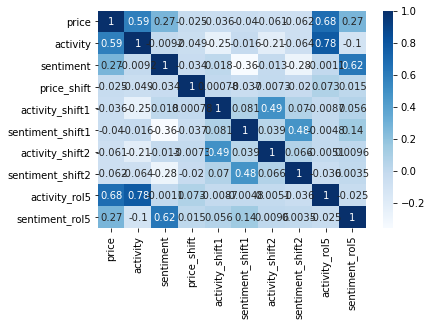

reg.score 0.007277956505350236
reg.coef_ [[ 4.5721069  -0.17529969 -6.57997779  0.00871347  7.67454556  0.0137117 ]]
reg.intercept_ [-1.01240973]
r^2 0.007277956505350236
NVDA (15275, 2) (582, 4) (971, 12)
            price    activity   sentiment  price_shift  activity_shift1  \
count  971.000000  971.000000  971.000000   971.000000       971.000000   
mean   125.465979    0.020672    0.449022    -0.089603         0.001314   
std     78.012682    0.012572    1.806696     5.097584         0.009091   
min     31.554655    0.008700   -5.000000   -32.013885        -0.058300   
25%     50.279961    0.012000   -1.000000    -1.923439        -0.002400   
50%    127.264420    0.015200    0.000000    -0.189552         0.001200   
75%    181.680794    0.027050    2.000000     1.535728         0.006750   
max    333.591766    0.089100    5.000000    20.712128         0.050900   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count        971.000000       971.000000 

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


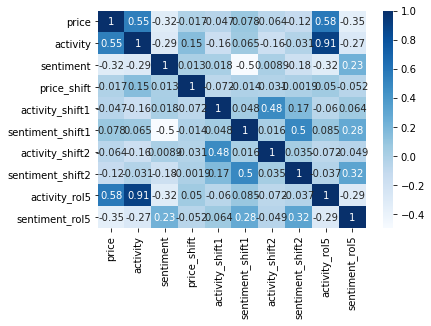

reg.score 0.009476113030387312
reg.coef_ [[-1.10507231e+02 -3.18353861e-02  6.60892472e+00  8.94360922e-02
   5.04271925e+00 -1.62719442e-02]]
reg.intercept_ [-0.22249669]
r^2 0.009476113030387312
QQQ (15275, 2) (635, 4) (977, 12)
            price    activity   sentiment  price_shift  activity_shift1  \
count  977.000000  977.000000  977.000000   977.000000       977.000000   
mean   266.517728    0.017159    3.766633    -0.125153         0.000387   
std     75.384428    0.007148    3.159164     4.385736         0.002963   
min    140.399094    0.007200   -6.000000   -14.816513        -0.011900   
25%    188.805435    0.011600    2.000000    -2.317169        -0.000900   
50%    275.266602    0.015300    4.000000    -0.397369         0.000600   
75%    330.934601    0.019800    6.000000     1.762726         0.002200   
max    402.208679    0.040700   15.000000    22.727859         0.013300   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count        977

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


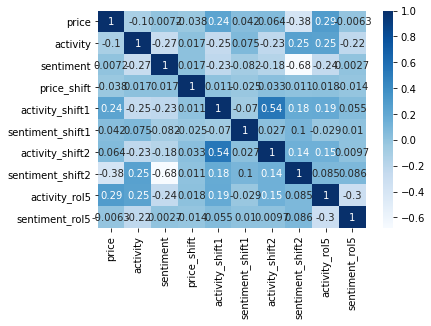

reg.score 0.0022669568332547296
reg.coef_ [[-1.60752899e+01 -5.17153153e-01  4.84290210e+01  8.18187790e-02
   2.93922818e+00 -4.39115424e-02]]
reg.intercept_ [-0.49786796]
r^2 0.0022669568332547296
ROKU (15275, 2) (204, 4) (857, 12)
            price    activity   sentiment  price_shift  activity_shift1  \
count  857.000000  857.000000  857.000000   857.000000       857.000000   
mean   196.876768    0.019649   -2.539090    -0.008658         0.007978   
std    113.404131    0.008009    3.737743     8.912615         0.008081   
min     56.500000    0.009200  -10.000000   -53.000000        -0.068200   
25%    107.370003    0.014300   -3.000000    -4.000000         0.003500   
50%    147.199997    0.020200   -1.000000    -0.090000         0.011100   
75%    311.959991    0.024900    0.000000     4.089996         0.011100   
max    479.500000    0.083800    2.000000    32.250008         0.064100   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count        

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


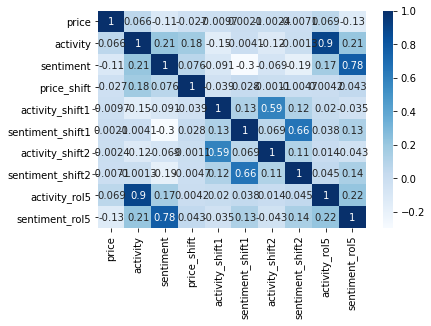

reg.score 0.005888178539340538
reg.coef_ [[-6.05314493e+01  1.33529075e-01  4.36304081e+01 -1.50023725e-01
  -4.31747636e-01  1.18578723e-02]]
reg.intercept_ [-0.20562629]
r^2 0.005888178539340538
SPY (15275, 2) (957, 4) (991, 12)
            price    activity   sentiment  price_shift  activity_shift1  \
count  991.000000  991.000000  991.000000   991.000000       991.000000   
mean   344.854839    0.022845    2.151362    -0.121352        -0.000018   
std     71.127864    0.009361    3.342305     4.474374         0.004518   
min    215.649429    0.009400   -9.000000   -20.395508        -0.021000   
25%    278.557678    0.015100    0.000000    -2.318863        -0.002500   
50%    328.283356    0.020100    2.000000    -0.323303         0.000100   
75%    413.038040    0.028950    4.000000     1.625885         0.002600   
max    474.182190    0.052400   14.000000    28.338364         0.015400   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count        991

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


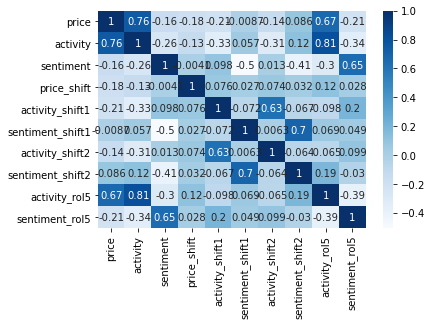

reg.score 0.02710538502050741
reg.coef_ [[2.93819913e+01 2.00917104e-02 3.37439072e+01 7.88895755e-04
  1.28423340e+01 1.39178649e-02]]
reg.intercept_ [-1.91133022]
r^2 0.02710538502050741
SQQQ (15275, 2) (148, 4) (150, 12)
            price    activity   sentiment  price_shift  activity_shift1  \
count  150.000000  150.000000  150.000000   150.000000       150.000000   
mean    45.138533    0.023594    5.613333    -0.039400         0.000149   
std      8.160752    0.007378    3.214453     2.920395         0.004831   
min     31.370001    0.010400   -3.000000    -7.689999        -0.011900   
25%     38.457500    0.017900    3.000000    -1.802500        -0.002975   
50%     43.955000    0.023900    6.000000    -0.174999         0.000600   
75%     50.827498    0.029275    8.000000     2.070000         0.003975   
max     66.089996    0.041700   13.000000     6.320000         0.012500   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count        150.000000

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


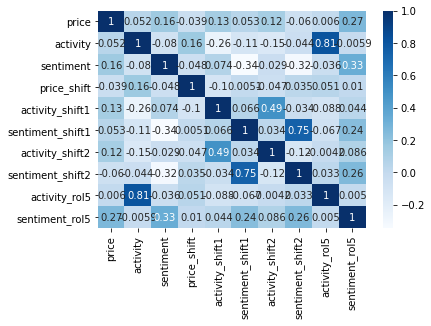

reg.score 0.013915838699801397
reg.coef_ [[-6.97156480e+01 -1.28774363e-02  7.18811703e+00  3.92246889e-02
   3.78845822e+00  8.62975378e-04]]
reg.intercept_ [-0.30601821]
r^2 0.013915838699801397
TQQQ (15275, 2) (463, 4) (775, 12)
            price    activity   sentiment  price_shift  activity_shift1  \
count  775.000000  775.000000  775.000000   775.000000       775.000000   
mean    40.436874    0.015356    4.114839    -0.015610         0.000560   
std     20.091073    0.004827    3.642056     1.883628         0.002801   
min      8.877500    0.007900   -8.000000    -6.925003        -0.008700   
25%     23.480000    0.011550    2.000000    -1.034999        -0.001100   
50%     36.275002    0.013800    5.000000    -0.167500         0.000800   
75%     53.942499    0.018200    6.000000     0.717499         0.002800   
max     88.570000    0.032200   19.000000     7.759998         0.010200   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count        77

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


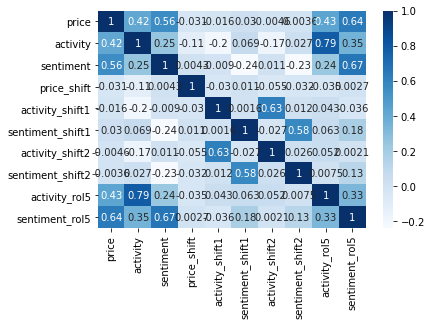

reg.score 0.006581215014685005
reg.coef_ [[ 2.51724117e+00  3.14602245e-01 -2.64961854e+01 -5.93333259e-01
  -2.62280842e+00  1.50941795e-02]]
reg.intercept_ [0.2884014]
r^2 0.006581215014685005
TSLA (15275, 2) (863, 4) (985, 12)
            price    activity   sentiment  price_shift  activity_shift1  \
count  985.000000  985.000000  985.000000   985.000000       985.000000   
mean   146.638495    0.039689    0.324873    -0.255250         0.000435   
std    119.830546    0.027016    1.570187     7.484488         0.019358   
min     11.931333    0.009400   -5.000000   -47.666656        -0.169900   
25%     22.413334    0.018100    0.000000    -2.206680        -0.006300   
50%    138.363327    0.035100    0.000000    -0.126678         0.001500   
75%    245.706665    0.051500    1.000000     1.282000         0.008500   
max    409.970001    0.206000    5.000000    46.480011         0.092700   

       sentiment_shift1  activity_shift2  sentiment_shift2  activity_rol5  \
count        985.

<ipython-input-158-784562a6eec5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')


In [158]:
for t in prices.columns:
    
    df1 = prices[[t]]
    df1 = df1.reset_index()
    df2 = df[df['ticker']==t]
    df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore')

    if df2.shape[0] > 100:
        df3 = pd.merge(df1, df2, left_on = 'Date', right_on = 'date', how = 'outer')
        df3 = df3.rename({t:'price'}, axis = 1).drop('ticker', axis=1) 
        df3['price_shift'] = df3['price'].shift(1) - df3['price'] 
        df3['activity_shift1'] = df3['activity'].shift(3) - df3['activity'].shift(1)
        df3['sentiment_shift1'] = df3['sentiment'].shift(3) - df3['sentiment'].shift(1)  
        df3['activity_shift2'] = df3['activity'].shift(2) - df3['activity'].shift(1)
        df3['sentiment_shift2'] = df3['sentiment'].shift(2) - df3['sentiment'].shift(1) 
        df3['activity_rol5'] = df3['activity'].rolling(5).sum().shift(1)
        df3['sentiment_rol5'] = df3['sentiment'].rolling(5).sum().shift(1)
        
        
        df3 = df3.ffill().dropna()
        
        # plot corr
        corr = df3.corr()
        sb.heatmap(corr, cmap="Blues", annot=True)
        plt.show()
        
        try:
            # Regression for simple testing
            X = df3[[ 'activity_shift1', 'sentiment_shift1', 'activity_shift2',
                   'sentiment_shift2', 'activity_rol5', 'sentiment_rol5']]
            y = df3[['price_shift']]
            reg = LinearRegression().fit(X, y)
            print('reg.score',reg.score(X, y))
            print('reg.coef_', reg.coef_)
            print('reg.intercept_', reg.intercept_)

            pred =  reg.predict(X)
            r2 = r2_score(y, pred)
            print('r^2', r2)    
        except:
            continue

        
        print(t, df1.shape, df2.shape, df3.shape)
        print(df3.ffill().describe())
        print()
        
#     break


In [146]:
df3.columns

Index(['Date', 'price', 'date', 'activity', 'sentiment', 'price_shift',
       'activity_shift1', 'sentiment_shift1', 'activity_shift2',
       'sentiment_shift2', 'activity_rol5', 'sentiment_rol5'],
      dtype='object')

reg.score 0.006581215014685005
reg.coef_ [[ 2.51724117e+00  3.14602245e-01 -2.64961854e+01 -5.93333259e-01
  -2.62280842e+00  1.50941795e-02]]
reg.intercept_ [0.2884014]
r^2 0.006581215014685005


[]

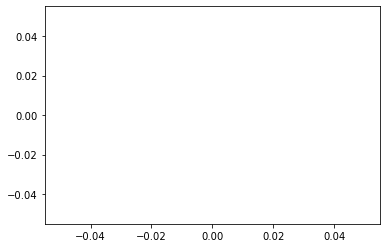

In [104]:
        corr = df3.corr()
        corr.style.background_gradient(cmap='coolwarm').set_precision(2)  
        plt.plot()

In [106]:
df3.corr()

,price,activity,sentiment,price_shift,activity_shift,sentiment_shift
price,1.000000,0.423776,0.564396,-0.031959,0.007508,0.004511
activity,0.423776,1.000000,0.260606,0.012105,-0.349935,-0.011369
sentiment,0.564396,0.260606,1.000000,-0.006075,0.051926,-0.177214
price_shift,-0.031959,0.012105,-0.006075,1.000000,0.061033,0.106190
activity_shift,0.007508,-0.349935,0.051926,0.061033,1.000000,0.017097
sentiment_shift,0.004511,-0.011369,-0.177214,0.106190,0.017097,1.000000


[]

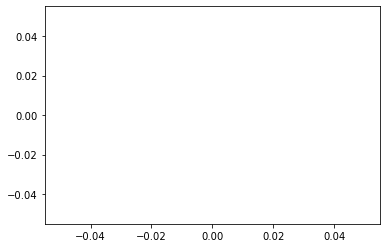

In [121]:
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)  
plt.show()
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)  
plt.show()
plt.plot()

In [119]:
corr

,price,activity,sentiment,price_shift,activity_shift,sentiment_shift
price,1.000000,0.423776,0.564396,-0.031959,0.007508,0.004511
activity,0.423776,1.000000,0.260606,0.012105,-0.349935,-0.011369
sentiment,0.564396,0.260606,1.000000,-0.006075,0.051926,-0.177214
price_shift,-0.031959,0.012105,-0.006075,1.000000,0.061033,0.106190
activity_shift,0.007508,-0.349935,0.051926,0.061033,1.000000,0.017097
sentiment_shift,0.004511,-0.011369,-0.177214,0.106190,0.017097,1.000000


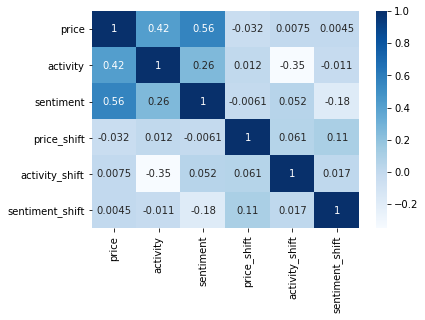

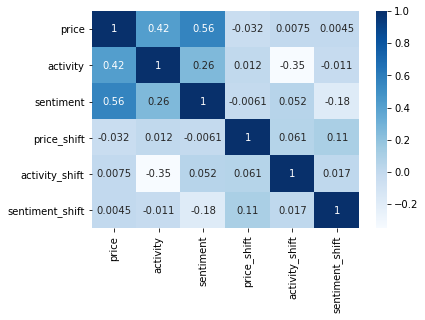

In [133]:
import seaborn as sb
corr = df3.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show()

<AxesSubplot:>

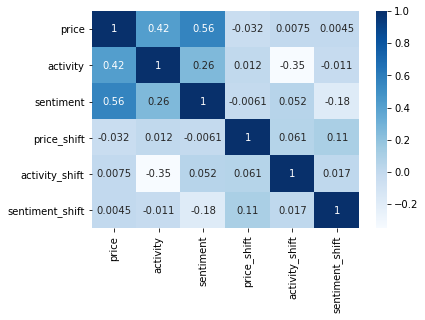

In [131]:
sb.heatmap(corr, cmap="Blues", annot=True)

[]

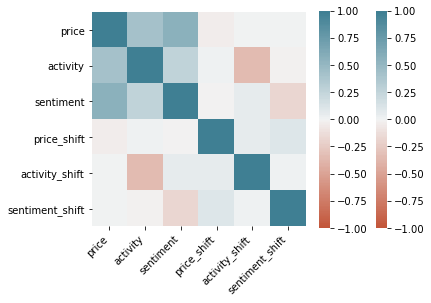

In [129]:
import seaborn as sns
corr = df3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.plot()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.plot()